In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [5]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [6]:
X_train.shape #about 60k training samples

(60000, 28, 28)

In [7]:
X_test.shape #about 10k test samples

(10000, 28, 28)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

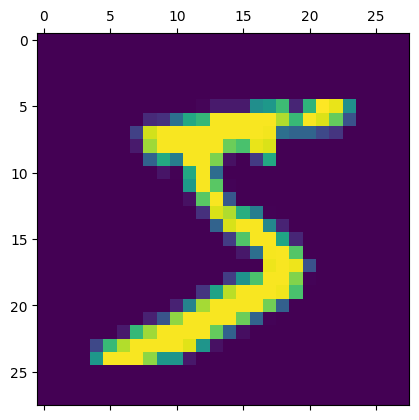

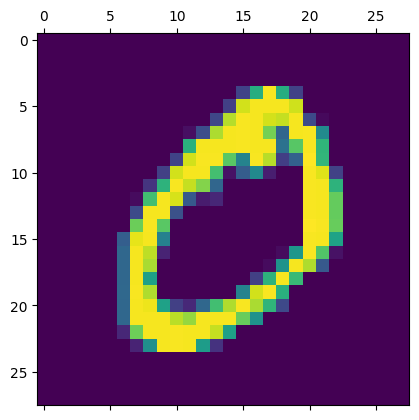

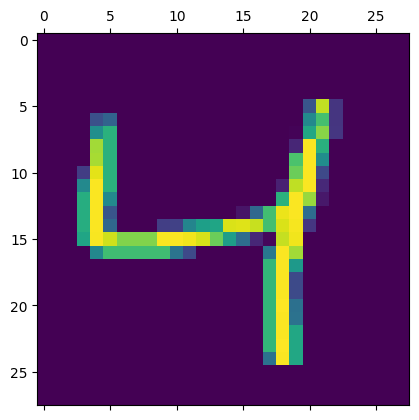

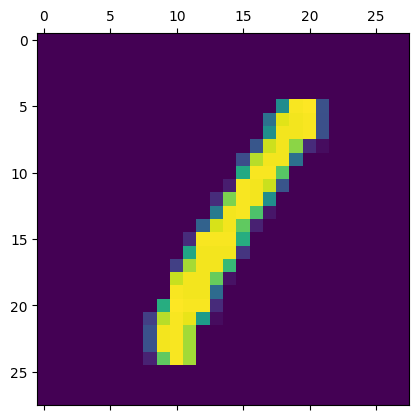

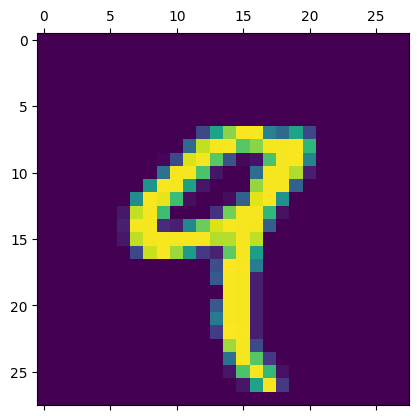

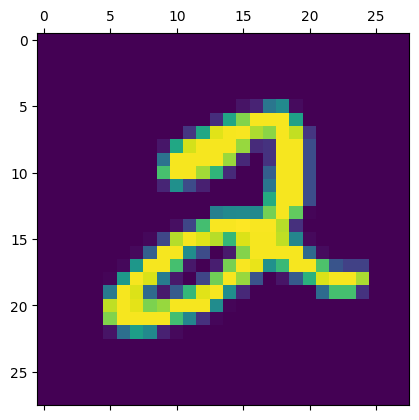

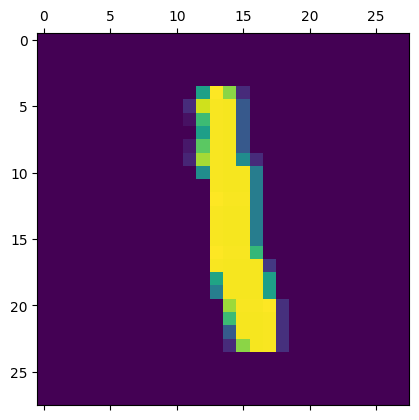

In [10]:
for i in range(0,7):
  plt.matshow(X_train[i])  #plots the first 7 training sample

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [66]:
#creating NN with a flattened input layer of 784 input nodes,1 hidden layer with 100 nodes and output layer with 10 nodes using SOFTMAX activation
model=Sequential()
model.add(Flatten(input_shape=(28,28))) #Flattening the 28x28 matrix into a 1-d array of 784 elements
model.add(Dense(100,activation="relu")) #one hidden layer with 100 nodes using ReLU activation
model.add(Dense(10,activation='softmax')) #As there are 10 categories of digits to be specified in the output layer using softmax function
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [67]:
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.0695 - accuracy: 0.8309
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3776 - accuracy: 0.9029
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2922 - accuracy: 0.9230
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2541 - accuracy: 0.9336
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2411 - accuracy: 0.9381


In [68]:
model.evaluate(X_test,y_test) #evaluate the model performance based on test set

313/313 [==============================] - 1s 2ms/step - loss: 0.2353 - accuracy: 0.9407


[0.23534192144870758, 0.9406999945640564]

In [69]:
#find out the predicted values
y_predicted= model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [70]:
#import numpy as np
y_predicted_labels= [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]                                  #find the first 5 predicted test labels and check whether they match with actual test labels

[7, 2, 1, 0, 4]

In [42]:
y_test[:5] #thus predicted labels match with given test samples

array([7, 2, 1, 0, 4], dtype=uint8)

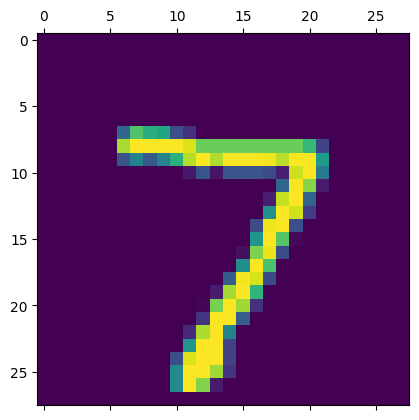

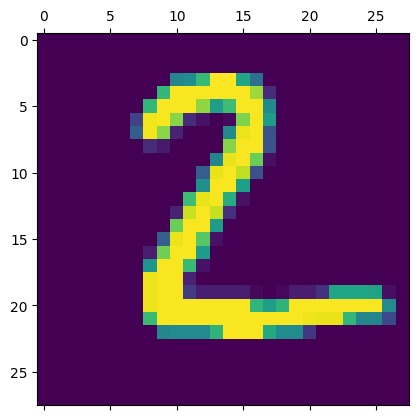

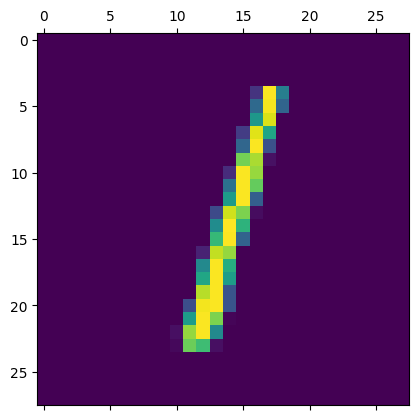

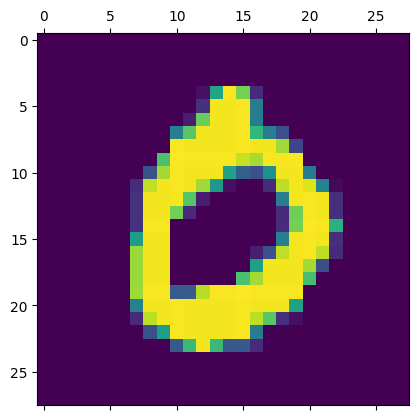

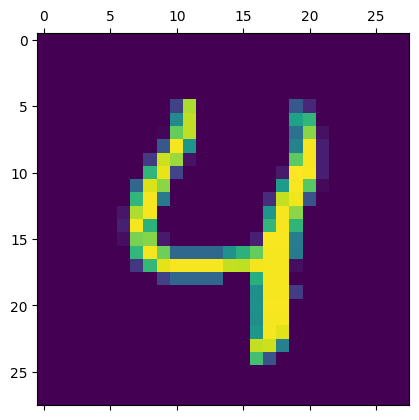

In [44]:
for i in range(0,5):
  plt.matshow(X_test[i])

Text(50.722222222222214, 0.5, 'Predicted')

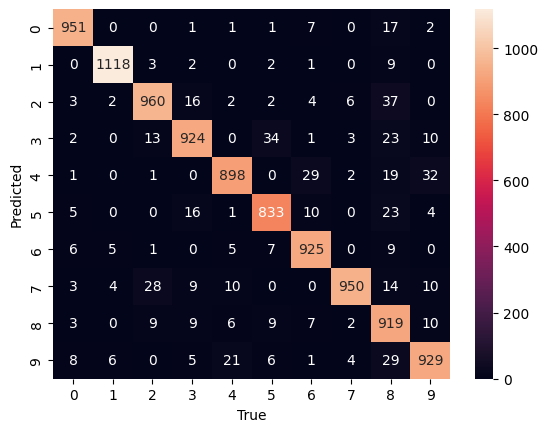

In [71]:
import seaborn as sns
from tensorflow.math import confusion_matrix
cm= confusion_matrix(labels=y_test,predictions=y_predicted_labels)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('True')
plt.ylabel('Predicted')